### (Optinal) Finish the k-person-salesman problem:

给定一个初始点 𝑃, 已经 𝑘个车辆，如何从该点出发，经这 k 个车辆经过所以的点全部一次，而且所走过的路程最短?


## 动态规划的几个关键：
链接：https://www.zhihu.com/question/23995189/answer/613096905

无后效性：一旦f(n)确定，“我们如何凑出f(n)”就再也用不着了。　　要求出f(15)，只需要知道f(14),f(10),f(4)的值，而f(14),f(10),f(4)是如何算出来的，对之后的问题没有影响。　　“未来与过去无关”，这就是无后效性。　　（严格定义：如果给定某一阶段的状态，则在这一阶段以后过程的发展不受这阶段以前各段状态的影响。）


最优子结构：大问题的最优解可以由小问题的最优解推出，这个性质叫做“最优子结构性质”。

引入这两个概念之后，我们如何判断一个问题能否使用DP解决呢？

能将大问题拆成几个小问题，且满足无后效性、最优子结构性质。


In [1]:
import random
import matplotlib.pylab as plt

In [2]:
latitudes = [random.randint(-100, 100) for _ in range(20)]
longitudes = [random.randint(-100, 100) for _ in range(20)]
coordinate = list(zip(latitudes,longitudes)) #给出坐标
len(latitudes),coordinate[0]

(20, (74, 63))

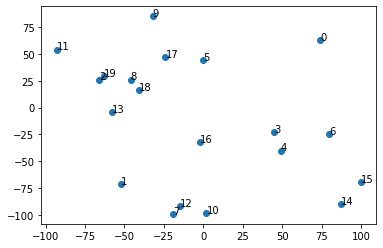

In [3]:
fig, ax = plt.subplots()

ax.scatter(latitudes, longitudes)

for i in range(len(longitudes)):
    ax.annotate(i, (latitudes[i], longitudes[i]))

In [4]:
from typing import List, Tuple
from copy import deepcopy
import numpy as np

def get_distance(x: tuple, y: tuple) -> float:
    return np.sqrt((x[0]-y[0])**2 + (x[-1]-y[-1])**2)
def tsp(coordinates: List[Tuple[int, int]], start: int=0) -> np.float64:
    length = len(coordinates)
    all_distances = {frozenset([i, j]): get_distance(coordinates[i], coordinates[j]) for i in range(length) for j in range(i+1, length)}
    opt = [[[i], i, all_distances[frozenset([start, i])]] for i in range(length) if i != start]
    while len(opt[0][0]) < length-1:
        opt_n = []
        for j in range(length):
            if j == start: continue
            tmp = [None, j, float('inf')]
            for visited, cur, dist in opt:
                if j in visited: continue
                tmp_dist = all_distances[frozenset([cur, j])]
                if tmp_dist + dist < tmp[-1]:
                    tmp[0] = visited + [j]
                    tmp[-1] = tmp_dist + dist
            if tmp[0]: opt_n.append(deepcopy(tmp))
        opt = opt_n
    min_distance = float('inf')
    route = None
    for visited, cur, dist in opt:
        tmp_dist = all_distances[frozenset([cur, start])] + dist
        if tmp_dist < min_distance:
            min_distance = tmp_dist
            route = visited
    return min_distance, route

In [5]:
tsp(coordinate)

(934.7890467768316,
 [5, 17, 18, 8, 19, 2, 13, 16, 3, 4, 6, 15, 14, 12, 7, 10, 1, 11, 9])

In [9]:
def tsp(coordinates: List[Tuple[int, int]]) -> np.float64:
    tsp.solutions = {}
    length = len(coordinates)
    dp = [[float('inf')] * 2**(length-1) for _ in range(length)]
    # 计算所有城市两两之间的距离
    all_distances = {frozenset([i, j]): get_distance(coordinates[i], coordinates[j]) for i in range(length) for j in range(i+1, length)}
    for i in range(length):
        if i == 0: continue
        dp[i][0] = all_distances[frozenset([i, 0])]
    for j in range(1, len(dp[0])):
        for i in range(length):
            if i != 0 and (j >> (i - 1)) & 1 == 1: # 出发的城市在要经过的城市里，不合常理
                continue
            tsp.solutions[(i, j)] = (None, None)
            for k in range(1, length):
                if (j >> (k - 1)) & 1 == 0: continue # 不经过该城市则查看下一个城市
                tmp_dist = all_distances[frozenset([i, k])] + dp[k][j ^ (1 << (k - 1))]
                if dp[i][j] > tmp_dist:
                    dp[i][j] = tmp_dist
                    tsp.solutions[(i, j)] = (k, j ^ (1 << (k - 1)))
    return dp[0][-1]

In [10]:
tsp(coordinate)

797.7884627029662

In [11]:
def parse_solutions(length: int, solutions: dict) -> str:
    route = ['0']
    def helper(row: int, col: int) -> None:
        i, j = solutions[(row, col)]
        route.append(str(i))
        if j == 0: return
        helper(i, j)
    helper(0, 2**(length-1)-1)
    route.append('0')
    return route

def pretty_print(route: List[str]) -> str:
    print('->'.join(route))

In [13]:
pretty_print(parse_solutions(len(coordinate), tsp.solutions))

0->6->15->14->4->3->16->10->12->7->1->13->18->8->19->2->11->9->17->5->0
